In [2]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [4]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

In [5]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


1. Change the Marked State

{'010': 120, '101': 142, '011': 133, '110': 119, '001': 127, '100': 124, '000': 140, '111': 119}


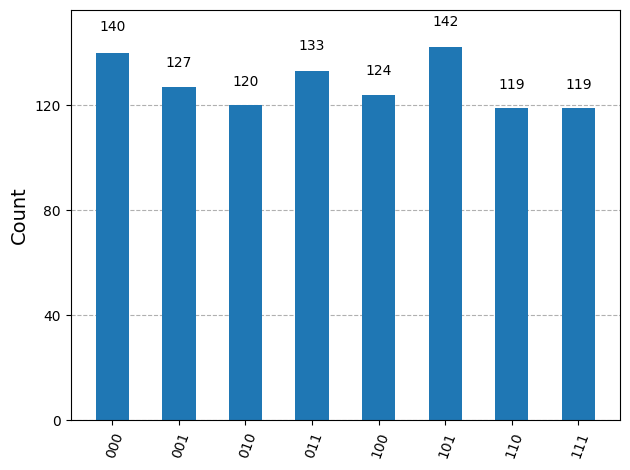

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def grover_oracle(qc, marked_state):
    for idx, bit in enumerate(marked_state):
        if bit == '0':
            qc.x(idx)
    qc.mcx(list(range(len(marked_state)-1)), len(marked_state)-1)
    for idx, bit in enumerate(marked_state):
        if bit == '0':
            qc.x(idx)

def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.mcx(list(range(n-1)), n-1)
    qc.x(range(n))
    qc.h(range(n))

n = 3
marked_state = '010'      # Try '101', '001', '111', etc.
qc = QuantumCircuit(n, n)
qc.h(range(n))
grover_oracle(qc, marked_state)
diffuser(qc, n)
qc.measure(range(n), range(n))

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
counts = backend.run(compiled, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

2. Modify the Number of Qubits

{'0101': 58, '0111': 72, '0001': 69, '1000': 72, '1100': 57, '1111': 63, '0110': 75, '1101': 64, '1011': 52, '0010': 54, '1110': 56, '0100': 64, '0011': 75, '0000': 74, '1001': 65, '1010': 54}


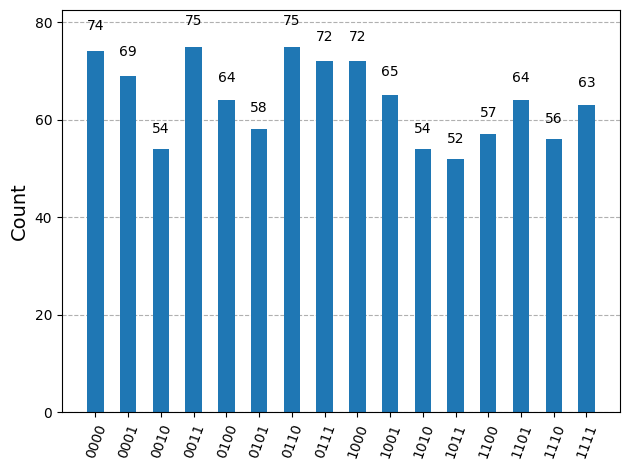

In [7]:
n = 4
marked_state = '1010'     # Choose your 4-bit marked state
qc = QuantumCircuit(n, n)
qc.h(range(n))
grover_oracle(qc, marked_state)
diffuser(qc, n)
qc.measure(range(n), range(n))
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
counts = backend.run(compiled, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

3. Add Multiple Iterations

{'011': 132, '101': 512, '001': 127, '000': 124, '010': 129}


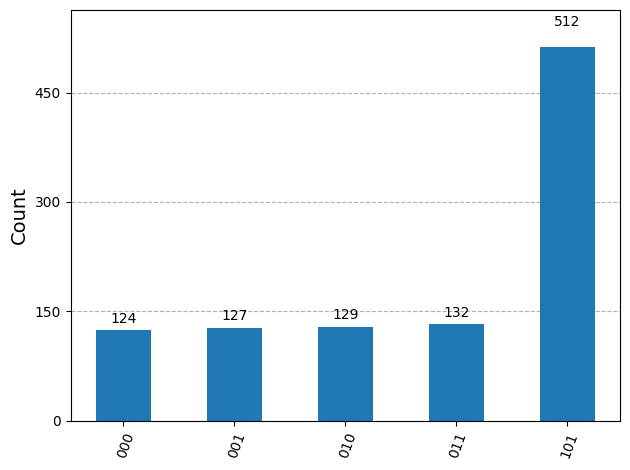

In [8]:
n = 3
marked_state = '101'
qc = QuantumCircuit(n, n)
qc.h(range(n))

iterations = 2
for _ in range(iterations):
    grover_oracle(qc, marked_state)
    diffuser(qc, n)

qc.measure(range(n), range(n))
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
counts = backend.run(compiled, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

4. Circuit Visualization

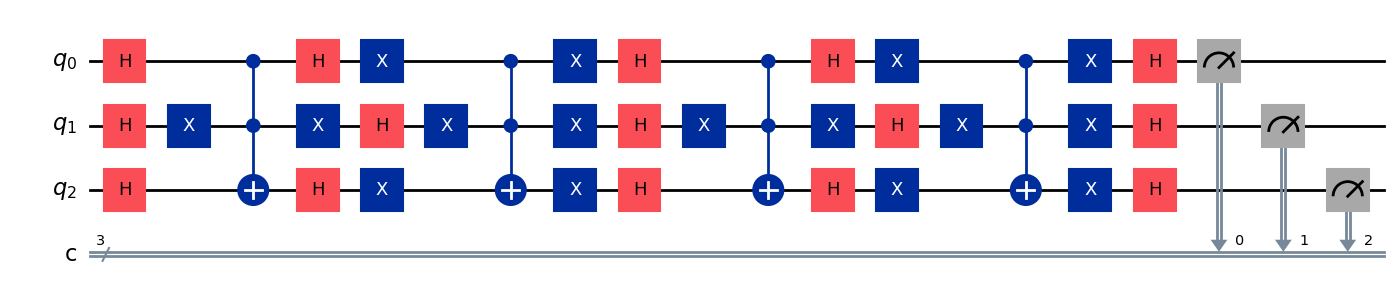

In [9]:
qc.draw('mpl')

5. Experiment with Noise

{'101': 507, '001': 143, '011': 133, '000': 134, '010': 107}


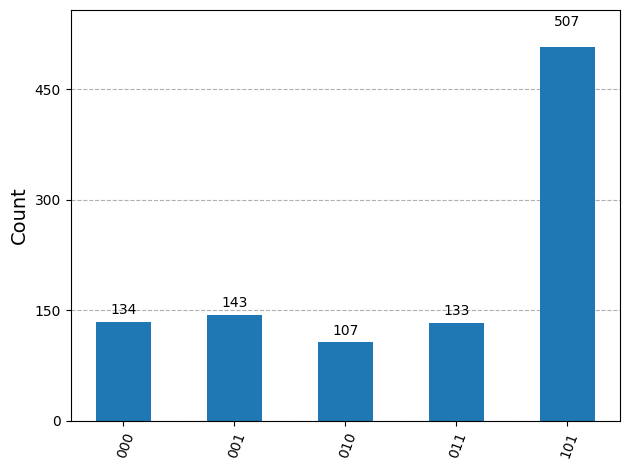

In [10]:
from qiskit_aer import noise

noise_model = noise.NoiseModel()                       # Default noise, or build your own
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, noise_model=noise_model, shots=1024)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)